## IMPORT THƯ VIỆN

In [1]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
import re
import requests
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Đọc dữ liệu

In [ ]:
df = pd.read_csv(r'/content/spotify_data.csv')

In [ ]:
df.head(5)

,track_name,artist_name,album_name,popularity,market,genres,duration_mins,release_year,tempo,speechiness,loudness,liveness,instrumentalness,energy,acousticness,valence
0,Sparks,Coldplay,Parachutes,84,USA,"permanent wave, pop",3.784883,2000,102.617,0.0281,-10.506,0.1040,0.051700,0.268,0.74800,0.165
1,The Real Slim Shady,Eminem,The Marshall Mathers LP,86,USA,"detroit hip hop, hip hop, rap",4.736667,2000,104.504,0.0572,-4.244,0.0454,0.000000,0.661,0.03020,0.760
2,Yellow,Coldplay,Parachutes,87,USA,"permanent wave, pop",4.446217,2000,173.372,0.0281,-7.227,0.2340,0.000121,0.661,0.00239,0.285
3,In the End,Linkin Park,Hybrid Theory (Bonus Edition),85,USA,"alternative metal, nu metal, post-grunge, rap ...",3.614667,2000,105.143,0.0584,-5.870,0.2090,0.000000,0.864,0.00958,0.400
4,Kryptonite,3 Doors Down,The Better Life,78,USA,"alternative metal, nu metal, pop rock, post-gr...",4.508433,2000,99.009,0.0286,-5.708,0.1680,0.000011,0.865,0.00664,0.543


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        10000 non-null  object 
 1   artist_name       10000 non-null  object 
 2   album_name        10000 non-null  object 
 3   popularity        10000 non-null  int64  
 4   market            10000 non-null  object 
 5   genres            10000 non-null  object 
 6   duration_mins     10000 non-null  float64
 7   release_year      10000 non-null  int64  
 8   tempo             9794 non-null   float64
 9   speechiness       9794 non-null   float64
 10  loudness          9794 non-null   float64
 11  liveness          9794 non-null   float64
 12  instrumentalness  9794 non-null   float64
 13  energy            9794 non-null   float64
 14  acousticness      9794 non-null   float64
 15  valence           9794 non-null   float64
dtypes: float64(9), int64(2), object(5)
memory

In [ ]:
df.describe()

,popularity,duration_mins,release_year,tempo,speechiness,loudness,liveness,instrumentalness,energy,acousticness,valence
count,10000.00000,10000.000000,10000.000000,9794.000000,9794.000000,9794.000000,9794.000000,9794.000000,9794.000000,9794.000000,9794.000000
mean,59.93570,3.866828,2009.817600,122.386905,0.092437,-6.675199,0.186211,0.053423,0.669921,0.217499,0.491092
std,8.99907,1.189037,5.641286,30.629611,0.096739,3.460022,0.145382,0.182675,0.212296,0.270498,0.244033
min,39.00000,0.558217,2000.000000,0.000000,0.000000,-41.766000,0.019300,0.000000,0.000252,0.000001,0.000000
25%,53.00000,3.299437,2005.000000,97.012250,0.035100,-7.900500,0.096200,0.000000,0.534000,0.011700,0.296000
50%,59.00000,3.793108,2010.000000,120.045500,0.050400,-5.925500,0.125000,0.000003,0.698000,0.091000,0.482000
75%,66.00000,4.318925,2015.000000,143.004750,0.103000,-4.493250,0.240000,0.000716,0.841000,0.332000,0.681000
max,91.00000,68.670970,2019.000000,220.099000,0.867000,0.522000,0.993000,0.994000,0.997000,0.996000,1.000000


## Preprocessing


In [3]:
df = df.drop_duplicates().reset_index(drop = True)
# Bỏ dữ liệu trùng nếu có

In [5]:
# Define a regex pattern to match Latin characters
regex_pattern = r'^[a-zA-Z\s]+$'

# Use str.match() on the 'Text' column to select rows with Latin characters
df = df[df['track_name'].str.match(regex_pattern)]

# Xử lí tên bài hát - bỏ các kí không phải latin

In [ ]:
# Loại bỏ các dòng có dữ liệu rỗng
df.dropna(inplace = True)
df.reset_index(inplace = True)


In [ ]:
df.drop(columns=['index'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        9794 non-null   object 
 1   artist_name       9794 non-null   object 
 2   album_name        9794 non-null   object 
 3   popularity        9794 non-null   int64  
 4   market            9794 non-null   object 
 5   genres            9794 non-null   object 
 6   duration_mins     9794 non-null   float64
 7   release_year      9794 non-null   int64  
 8   tempo             9794 non-null   float64
 9   speechiness       9794 non-null   float64
 10  loudness          9794 non-null   float64
 11  liveness          9794 non-null   float64
 12  instrumentalness  9794 non-null   float64
 13  energy            9794 non-null   float64
 14  acousticness      9794 non-null   float64
 15  valence           9794 non-null   float64
dtypes: float64(9), int64(2), object(5)
memory 

In [ ]:
df_X = df.drop(columns = ['track_name','album_name','market','artist_name','genres'])
#Loại bỏ các cột không phải định lượng

In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        9794 non-null   int64  
 1   duration_mins     9794 non-null   float64
 2   release_year      9794 non-null   int64  
 3   tempo             9794 non-null   float64
 4   speechiness       9794 non-null   float64
 5   loudness          9794 non-null   float64
 6   liveness          9794 non-null   float64
 7   instrumentalness  9794 non-null   float64
 8   energy            9794 non-null   float64
 9   acousticness      9794 non-null   float64
 10  valence           9794 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 841.8 KB


In [ ]:
#Chuẩn hóa các cột định lượng
scaler = StandardScaler().fit(df_X)
df_X_scaled = scaler.transform(df_X)
df_X_scaled =pd.DataFrame(df_X_scaled)
df_X_scaled.columns = df_X.columns

In [ ]:
df_X_scaled.head(5)

,popularity,duration_mins,release_year,tempo,speechiness,loudness,liveness,instrumentalness,energy,acousticness,valence
0,2.664404,-0.067151,-1.74506,-0.645484,-0.665084,-1.107218,-0.565514,-0.009433,-1.893310,1.961297,-1.336331
1,2.885802,0.731547,-1.74506,-0.583873,-0.364260,0.702690,-0.968612,-0.292464,-0.042023,-0.692459,1.101986
2,2.996501,0.487813,-1.74506,1.664654,-0.665084,-0.159487,0.328731,-0.291802,-0.042023,-0.795274,-0.844569
3,2.775103,-0.209989,-1.74506,-0.563010,-0.351855,0.232727,0.156761,-0.292464,0.914240,-0.768693,-0.373298
4,2.000210,0.540022,-1.74506,-0.763284,-0.659915,0.279550,-0.125270,-0.292404,0.918950,-0.779562,0.212718


<Axes: >

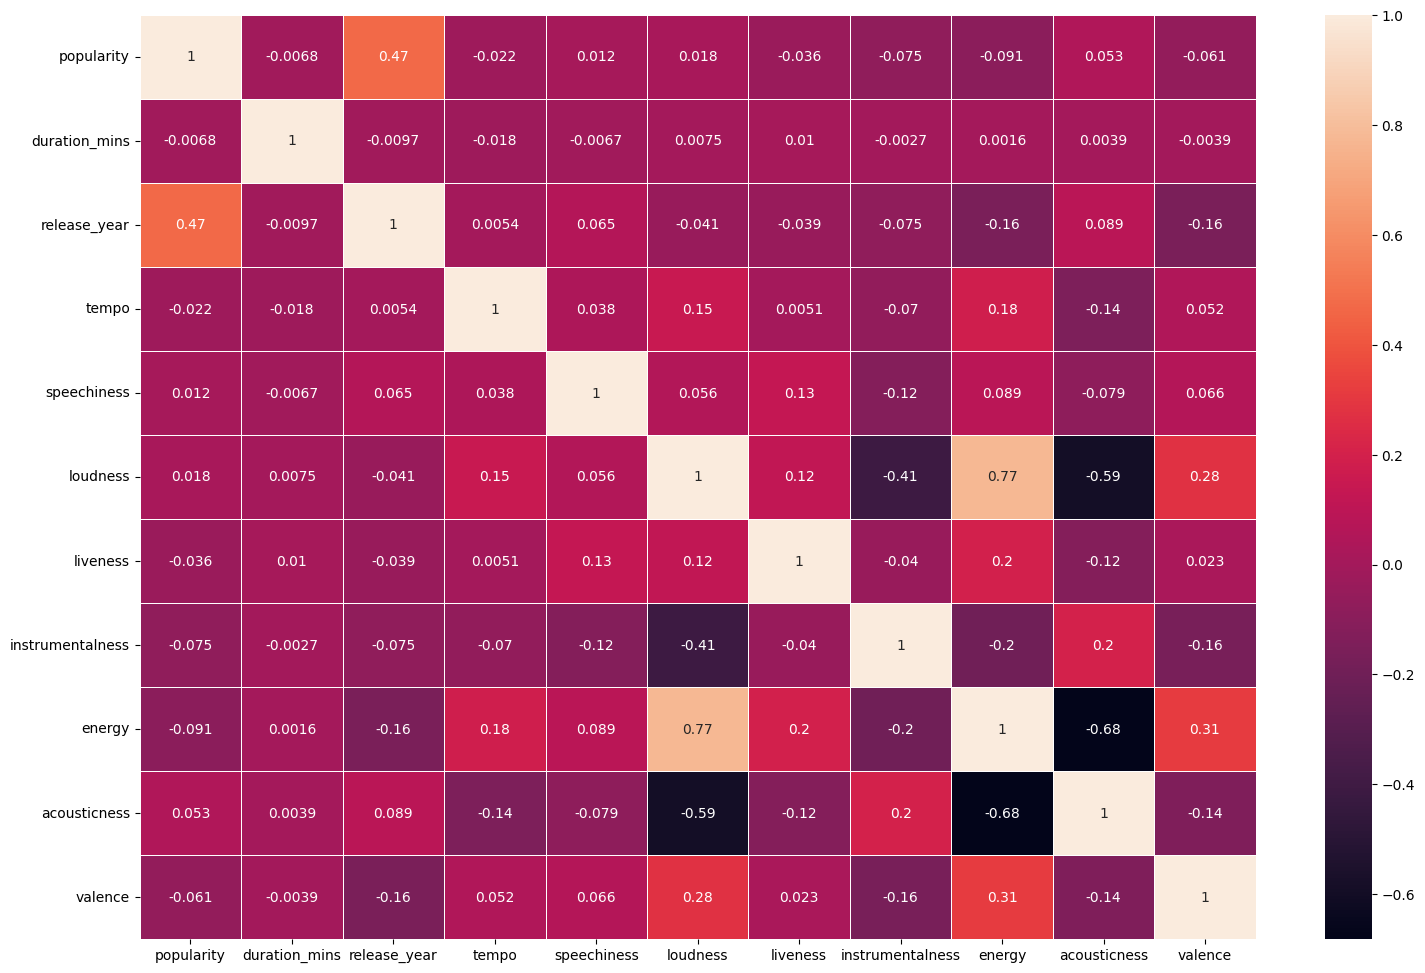

In [ ]:
plt.subplots(figsize=(18, 12))
corr = df_X_scaled.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5,annot=True)

### Chuẩn bị dữ liệu của User


In [ ]:
# Do là random nên đừng chạy cell này nhé anh em:)

# indices = np.arange(df_X_scaled.shape[0])
# random_indices = np.random.choice(indices, size=20, replace=False)

# # RANDOM SONGS FOR User
# user_X = df_X_scaled.loc[random_indices]
# print(user_X)

      popularity  duration_mins  release_year     tempo  speechiness  \
9560    0.893221       0.052332      1.622753  0.341520    -0.056200   
5650    0.229027      -0.188730      0.381980 -0.304424    -0.582383   
6230    0.229027      -0.482814      0.559233  0.180361    -0.572046   
4452   -1.431457      -1.380895     -0.149780  1.391799    -0.070673   
7965    0.671823      -0.681289      1.090993  0.246085     0.605405   
1444    0.118328      -0.424632     -1.213300  0.510124    -0.645442   
9321   -0.213769      -0.664632      1.445500  0.218953    -0.467636   
2819    0.118328       0.411547     -0.681540 -1.256035    -0.647510   
6544    0.450425      -0.454660      0.559233  0.116269    -0.512088   
4679   -0.103070      -1.214378      0.027473 -0.097979    -0.666118   
2709    0.893221       0.469730     -0.681540  0.444530    -0.669219   
6925   -0.545865       0.610652      0.736486  1.099518     0.698443   
7894    1.446716      -0.290744      1.090993 -0.732169    -0.28

In [ ]:
# Xem các bài nhạc đã được chọn
# df.loc[random_indices,['track_name','artist_name','genres']]

,track_name,artist_name,genres
9560,Leray,Trippie Redd,"melodic rap, rap, trap"
5650,When She Says Baby,Jason Aldean,"contemporary country, country, country road"
6230,We Are Tonight,Billy Currington,"contemporary country, country, country road"
4452,Anywhere but Here,Mayday Parade,"neon pop punk, pop emo, pop punk, rock"
7965,Lost In The Moment,NF,"hip hop, pop rap, rap"
1444,Entra en Mi Vida,Sin Bandera,"latin arena pop, latin pop, mexican pop"
9321,Fall in the Fall,Jelly Roll,"country rap, nashville hip hop, tennessee hip hop"
2819,Not Ready to Make Nice,The Chicks,"country, country dawn"
6544,You Make Me,Avicii,"dance pop, edm, pop, pop dance, pop rap"
4679,Dear John,Taylor Swift,pop


In [ ]:
user_y = [9,1,2,1,9.5,3.2,8.5,2,3,1,2,8.5,2,9,10,3,9,5,8,2]

## EDA

<Axes: xlabel='count', ylabel='release_year'>

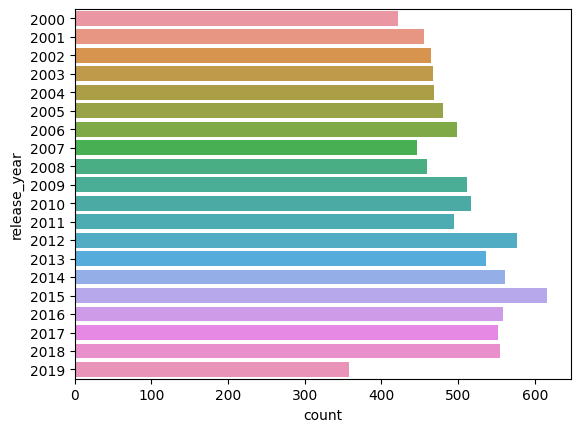

In [7]:
sns.countplot(data = df, y ='release_year')
# số bài hát được ra trong năm

In [8]:
df['artist_name'].nunique()
# số lượng nghệ sĩ trong bộ dữ liệu

1656

In [9]:
import statistics

duration_mean = statistics.mean(df['duration_mins'])
duration_mean
# Một bài nhạc trung bình dài khoảng 3.8 phút

3.8668282022

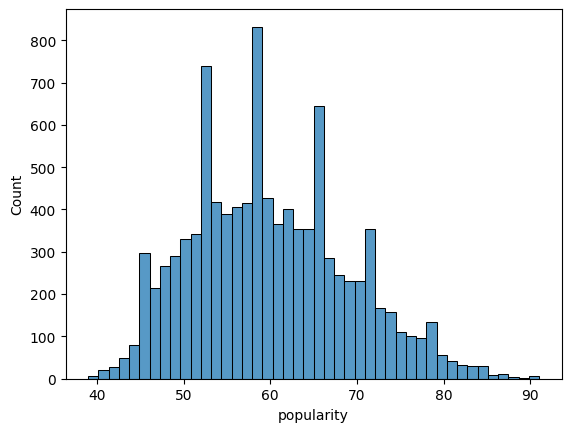

In [10]:
sns.histplot(data=df, x='popularity')
plt.show()

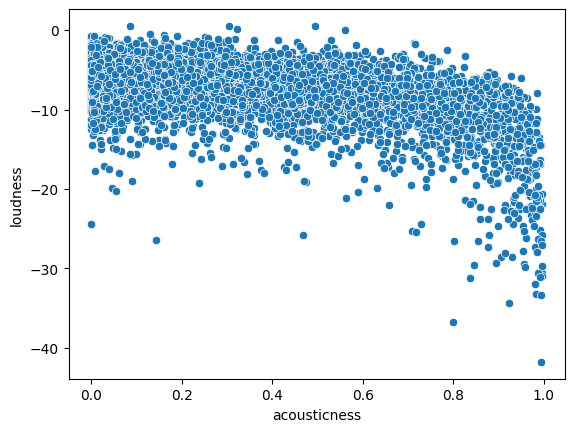

In [12]:
# Tương quan giữa acoustic và độ lớn
sns.scatterplot(data=df, x='acousticness', y='loudness')
plt.show()

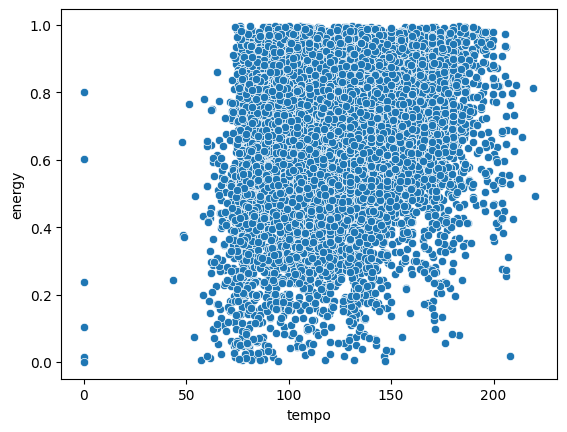

In [13]:
# tương quan giữa tempo và năng lượng của bài nhạc
sns.scatterplot(data=df, x='tempo', y='energy')
plt.show()

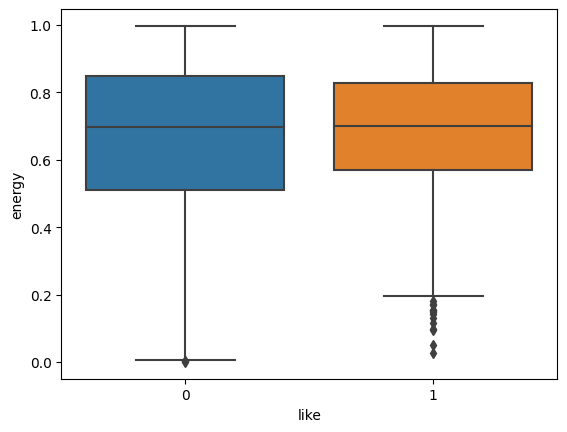

In [14]:
# Tương quan giữa 'like' và 'energy'
sns.boxplot(data=df, x='like', y='energy')
plt.show()

##Hồi Quy

In [ ]:
simple_LR_model = LinearRegression().fit(user_X, user_y)
# Sử dụng hồi quy tuyến tính

In [ ]:
# Xem các trong số của mô hình này
weights = zip(user_X.columns.values, simple_LR_model.coef_)
for weight in weights:
    print(weight)

('popularity', 1.7906619702879332)
('duration_mins', 1.546619954601484)
('release_year', 1.5066000047259527)
('tempo', 1.0731619987744296)
('speechiness', 0.6657490494805586)
('loudness', -2.65457033583634)
('liveness', -0.09440224295300015)
('instrumentalness', -0.7414249642270164)
('energy', 1.6427625807134334)
('acousticness', -0.9969647362296655)
('valence', -1.2186527179730067)


In [ ]:
df_X_scaled = df_X_scaled.dropna(axis=0)
df_X_scaled.shape
# loại bỏ các cột NA được tạo ra trong quá trình chuẩn hóa nếu có

(9794, 11)

In [ ]:
pred_linear = simple_LR_model.predict(df_X_scaled)

In [ ]:
lr_df = df_X_scaled.copy()
lr_df['predict rating'] = pred_linear

In [ ]:
# chọn ra top 5 bài được đánh giá điểm cao nhất theo mô hình hồi quy tuyến tính
lr_df_sorted = lr_df.sort_values(by=['predict rating'])
top_10_lr = lr_df_sorted[lr_df_sorted.shape[0] - 10:]
top_10_lr

,popularity,duration_mins,release_year,tempo,speechiness,loudness,liveness,instrumentalness,energy,acousticness,valence,predict rating
8549,1.336017,1.386272,1.268246,2.263125,0.967220,-0.173650,-0.989248,-0.291835,0.160535,-0.782557,-1.602701,17.176463
8864,1.003920,6.876607,1.268246,1.878118,-0.508986,0.329552,-0.317877,-0.292464,0.099297,0.094277,0.987242,18.147583
9685,0.339726,2.827723,1.622753,-1.286824,6.621877,-1.463014,-0.620544,-0.292464,-1.111341,-0.562322,-0.815883,18.231385
7347,1.003920,5.938428,0.913740,1.816345,-0.292931,0.753848,-1.021578,-0.292464,1.319356,-0.803334,-0.217573,19.547535
6646,2.553705,3.242113,0.736486,1.738279,2.734946,-0.414123,-0.503605,-0.292464,0.245327,-0.546425,0.196326,20.344142
9480,1.778812,0.502918,1.622753,2.794272,0.233252,-5.192082,1.381187,-0.292316,-3.077097,2.815319,-1.074058,20.767132
7783,-0.213769,0.410051,0.913740,1.659005,-0.372530,-5.116934,2.151613,5.121807,0.678707,-0.803932,-1.890382,20.852233
5532,-0.877962,2.370885,0.204726,-2.092132,7.676310,-7.099393,1.188581,-0.262409,-2.223055,2.290336,-1.151920,23.554053
5169,0.671823,0.004639,0.204726,0.808445,-0.563775,-10.142304,-0.748490,1.798791,-3.138053,2.867078,-1.858417,25.811589
7359,0.339726,54.382564,0.913740,-1.164616,1.163634,-1.147971,-0.015210,-0.292464,-1.002996,1.014847,0.429912,89.590224


In [ ]:
indices = [index for index in top_10_lr.index]
df.loc[indices,['track_name','artist_name','genres']]
# User ở trên chấm diểm cao cho những bài nhạc thuộc thể loại hip hop, rap --> kết quả gợi ý trong 10 bài xuất hiện 4 bài thuộc cùng thể loại

,track_name,artist_name,genres
8549,This Is Me,Keala Settle,"broadway, hollywood, show tunes"
8864,El Amante,Nicky Jam,"latin hip hop, reggaeton, urbano latino"
9685,Green Light,Rod Wave,florida rap
7347,Painkiller,Three Days Grace,"alternative metal, canadian metal, canadian ro..."
6646,Wet Dreamz,J. Cole,"conscious hip hop, hip hop, north carolina hip..."
9480,Bubble Gum,Clairo,"bedroom pop, indie pop, pop"
7783,Gentle Rain Fall,Rain Sounds,"environmental, sleep"
5532,Death,C418,pixel
5169,Key,C418,pixel
7359,Institution,Kodak Black,"florida drill, florida rap, hip hop, melodic r..."


In [ ]:
#Neural Network
model = Sequential([
    Dense(200, input_shape=(11,), activation='relu'), 
    Dense(150, activation='relu'), 
    Dense(100, activation='relu'), 
    Dense(1, activation='relu') 
])

In [ ]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [ ]:
user_y_arr = np.array(user_y)

In [ ]:
model.fit(user_X, user_y_arr, epochs=50, batch_size=32, validation_split = .2) 

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 4.5694 - val_loss: 5.4885
Epoch 2/50
1/1 [==============================] - 0s 40ms/step - loss: 4.3500 - val_loss: 5.2255
Epoch 3/50
1/1 [==============================] - 0s 33ms/step - loss: 4.1239 - val_loss: 4.9455
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 3.8834 - val_loss: 4.6370
Epoch 5/50
1/1 [==============================] - 0s 34ms/step - loss: 3.6338 - val_loss: 4.3120
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 3.3954 - val_loss: 4.0171
Epoch 7/50
1/1 [==============================] - 0s 51ms/step - loss: 3.2348 - val_loss: 3.8242
Epoch 8/50
1/1 [==============================] - 0s 37ms/step - loss: 3.0764 - val_loss: 3.6105
Epoch 9/50
1/1 [==============================] - 0s 34ms/step - loss: 2.9102 - val_loss: 3.3725
Epoch 10/50
1/1 [==============================] - 0s 33ms/step - loss: 2.7634 - val_loss: 3.3815
Epoch 11/50
1/1 [==============

In [ ]:
preds_nn = model.predict(df_X_scaled)

307/307 [==============================] - 0s 1ms/step


In [ ]:
df_nn = df_X_scaled.copy()
df_nn['predict rating'] = preds_nn

df_nn_sorted = df_nn.sort_values(by=['predict rating'])
top_10_nn = df_nn_sorted[df_nn_sorted.shape[0]-10:]
top_10_nn

,popularity,duration_mins,release_year,tempo,speechiness,loudness,liveness,instrumentalness,energy,acousticness,valence,predict rating
8480,0.782522,0.807071,1.268246,0.336361,4.378622,-2.847180,-0.366029,-0.287789,-2.171238,1.839293,-1.336331,21.368914
5360,-1.099360,-0.026269,0.204726,-1.441551,7.603947,-1.727187,0.225549,-0.292464,-0.663829,1.170124,-0.192985,21.597473
7648,-0.213769,1.005854,0.913740,-0.188941,5.743182,-1.763316,-0.544877,-0.292464,-1.502325,0.922420,-0.754413,22.335772
9228,0.339726,1.706272,1.445500,1.556746,3.965118,-0.307182,-0.476089,-0.292464,-0.597880,-0.656597,-1.352723,22.446274
7826,1.557415,-0.524031,1.090993,1.890003,6.663227,-1.268207,0.191155,-0.292464,-0.706225,0.334587,0.245502,23.095037
7988,0.671823,0.157185,1.090993,-1.438450,6.880316,-0.348802,-0.626735,-0.292464,0.179378,1.092486,-1.643682,23.920534
8311,0.450425,-0.847008,1.090993,-0.961991,8.007112,-2.713648,-0.517362,-0.292464,-1.417534,0.419619,0.474991,24.327671
9685,0.339726,2.827723,1.622753,-1.286824,6.621877,-1.463014,-0.620544,-0.292464,-1.111341,-0.562322,-0.815883,28.027428
5532,-0.877962,2.370885,0.204726,-2.092132,7.676310,-7.099393,1.188581,-0.262409,-2.223055,2.290336,-1.151920,29.747541
7359,0.339726,54.382564,0.913740,-1.164616,1.163634,-1.147971,-0.015210,-0.292464,-1.002996,1.014847,0.429912,135.462967


In [ ]:
indices = [index for index in top_10_nn.index]
df.loc[indices,['track_name','artist_name','genres']]
# Sử dụng neural network cho ta kết quả tốt hơn khi 7/10 bài gợi ý thuộc thể loại hip hop

,track_name,artist_name,genres
8480,Sunset,LUCKI,"plugg, rap"
5360,Goblin,"Tyler, The Creator","hip hop, rap"
7648,The World Was Wide Enough,Leslie Odom Jr.,"broadway, hollywood, show tunes, vocal jazz"
9228,asmr,21 Savage,"atl hip hop, rap"
7826,Jungle,A Boogie Wit da Hoodie,"melodic rap, rap"
7988,How Could You Leave Us,NF,"hip hop, pop rap, rap"
8311,Final Song,MÃƒËœ,"dance pop, danish pop, electropop, indie popti..."
9685,Green Light,Rod Wave,florida rap
5532,Death,C418,pixel
7359,Institution,Kodak Black,"florida drill, florida rap, hip hop, melodic r..."


## Phân Lớp

In [ ]:
X_train = df_X_scaled.copy()
y_train = df['like']

In [ ]:
y_train

0       0
1       1
2       0
3       1
4       0
       ..
9789    0
9790    1
9791    0
9792    0
9793    0
Name: like, Length: 9794, dtype: int64

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#phân dữ liệu train và test thành 80 -20

### Hồi quy logistic

In [ ]:
# Phân cụm với hồi quy logistic
est_model_lr = LogisticRegressionCV().fit(x_train, Y_train)

print("Logisic Regression R^2 Error on Train Set: {}".format(est_model_lr.score(x_train,Y_train)))
print("CV Error on Train Set: {}".format(`(est_model_lr, x_train, Y_train, cv=10)))
print("CV Error on Test Set: {}".format(cross_val_score(est_model_lr, x_test, Y_test, cv=10)))

Logisic Regression R^2 Error on Train Set: 0.789661774090619
CV Error on Train Set: [0.7869898  0.78316327 0.80739796 0.78826531 0.79081633 0.78671775
 0.80332056 0.78288633 0.79054917 0.7816092 ]
CV Error on Test Set: [0.81122449 0.79591837 0.76530612 0.83673469 0.75       0.84183673
 0.78061224 0.78571429 0.7755102  0.78974359]


In [ ]:
preds_lrr = est_model_lr.predict(X_train)
df_lrr = X_train.copy()
df_lrr['predict like'] = preds_lrr
df_lrr_sorted = df_lrr.sort_values(ascending=False,by=['predict like'])
top_10_lrr = df_lrr_sorted[:10]
indices = [index for index in top_10_lrr.index]
df.loc[indices,['track_name','artist_name','genres']]
# Với phương pháp hồi quy logistic, ta được 5/10 bài gợi ý thuộc dòng nhạc hip hop - rap

,track_name,artist_name,genres
5310,Above The Law,Bad Meets Evil,"detroit hip hop, gangster rap, hip hop, pop ra..."
2632,Ryder Music,50 Cent,"east coast hip hop, gangster rap, hip hop, pop..."
1426,Get Up Offa That Thing,James Brown,"funk, soul"
4428,My Darling,Eminem,"detroit hip hop, hip hop, rap"
2634,Human After All,Daft Punk,"electro, filter house"
1422,The Jump Off,Lil' Kim,"dance pop, east coast hip hop, gangster rap, h..."
8593,Icon,Jaden,"hip hop, pop, rap"
6722,Candy,Plan B,reggaeton
4434,Fade Away,Breaking Benjamin,"alternative metal, nu metal, post-grunge"
7639,The Adams Administration,Original Broadway Cast of Hamilton,"broadway, hollywood, show tunes"


### Random Forrest

In [ ]:
est_model_rf = RandomForestClassifier(50, min_samples_split=5, max_depth=20).fit(x_train, Y_train)

print("Random Forest MSE Error on Train Set: {}".format(est_model_rf.score(x_train,Y_train)))
print("CV Error on Train Set: {}".format(cross_val_score(est_model_rf, x_train, Y_train,cv=10)))
print("CV Error on Test Set: {}".format(cross_val_score(est_model_rf, x_test, Y_test, cv=10)))

Random Forest MSE Error on Train Set: 0.9851946394384173
CV Error on Train Set: [0.83163265 0.81122449 0.82142857 0.80867347 0.83163265 0.79565773
 0.82886335 0.80842912 0.81609195 0.81609195]
CV Error on Test Set: [0.79591837 0.81122449 0.76020408 0.85204082 0.7755102  0.86734694
 0.80102041 0.81632653 0.77040816 0.81025641]


In [ ]:
preds_rf = est_model_rf.predict(X_train)
df_rf = X_train.copy()
df_rf['predict like'] = preds_rf
df_rf_sorted = df_rf.sort_values(ascending=False,by=['predict like'])
top_10_nn = df_rf_sorted[:10]
indices = [index for index in top_10_nn.index]
df.loc[indices,['track_name','artist_name','genres']]
#Với random forest, ta có kết quả khả quan hơn khi 7/10 bài gợi ý thuộc thể loại hiphop

,track_name,artist_name,genres
1930,Back That Azz Up,JUVENILE,"bounce, crunk, dirty south rap, gangster rap, ..."
8369,Location,Playboi Carti,"atl hip hop, hip hop, plugg, pluggnb, rap"
7364,Sexy Drug,Falling In Reverse,"modern rock, rap metal"
2017,Bleeding Mascara,Atreyu,"alternative metal, melodic metalcore, metalcor..."
2018,Why,Jadakiss,"battle rap, east coast hip hop, gangster rap, ..."
3381,Go Girl,Pitbull,"dance pop, miami hip hop, pop, pop rap"
8373,Getaway Car,Taylor Swift,pop
8372,For the Last Time,$uicideboy$,"dark trap, new orleans rap, underground hip hop"
6267,Satellites,Kevin Gates,"baton rouge rap, pop rap, rap, southern hip ho..."
2023,Eye,Madvillain,"abstract hip hop, alternative hip hop, hip hop..."


### Gradient Boosting 

In [ ]:
est_model_gb = GradientBoostingRegressor(n_estimators=501, max_depth=1, learning_rate=1).fit(x_train,Y_train)

print("Boosting R^2 Error on Train Set: {}".format(est_model_gb.score(x_train,Y_train)))
print("CV Error on Train Set: {}".format(cross_val_score(est_model_gb, x_train, Y_train,cv=10)))
print("CV Error on Test Set: {}".format(cross_val_score(est_model_gb, x_test, Y_test, cv=10)))

Boosting R^2 Error on Train Set: 0.40032243299028447
CV Error on Train Set: [0.32890392 0.29015844 0.32704672 0.28245002 0.33177186 0.26743287
 0.36388246 0.31767785 0.34944035 0.27246471]
CV Error on Test Set: [0.23902456 0.1782504  0.22492399 0.27885008 0.15754262 0.31008501
 0.35497236 0.18382892 0.2457656  0.28210128]


In [ ]:
preds_gb = est_model_gb.predict(X_train)
df_gb = X_train.copy()
df_gb['predicted_in_playlist'] = preds_gb
df_gb_sorted = df_gb.sort_values(ascending=False,by=['predicted_in_playlist'])
top_10_nn = df_gb_sorted[:10]
indices = [index for index in top_10_nn.index]
df.loc[indices,['track_name','artist_name','genres']]
# Với Gradient Boosting ta có được gợi ý 10/10 bài đều thuộc thể loại hip hop - rap

,track_name,artist_name,genres
8174,Write Your Name,G Herbo,"chicago drill, chicago rap, drill, rap, southe..."
8600,It Takes Time,Trippie Redd,"melodic rap, rap, trap"
8118,Perkys Calling,Future,"atl hip hop, rap, southern hip hop, trap"
8988,Carrollton,$uicideboy$,"dark trap, new orleans rap, underground hip hop"
5238,Am I A Psycho,Tech N9ne,"hip hop, kansas city hip hop, pop rap"
2618,G Code,Geto Boys,"conscious hip hop, dirty south rap, g funk, ga..."
1353,Gangsta Nation,Westside Connection,"g funk, gangster rap, hardcore hip hop, hip ho..."
1256,Put It On Me,DJ Quik,"g funk, gangster rap, hardcore hip hop, hip ho..."
5332,My Shit Bang,E-40,"cali rap, gangster rap, hip hop, hyphy, oaklan..."
8111,Friend Zone,A Boogie Wit da Hoodie,"melodic rap, rap"
